# Extracting information from dataset


This notebook presents a case study to retrieve information from MazurkaBL dataset, provide tools to visualise it and imports models for dataset analysis.

## Import libraries

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pandas as bd
from data_processing import prepare_dataset, plot_beat_dyn


## Retrieve MazurkaBL dataset

In [2]:
files_beat = glob.glob('../beat_time/*.csv')
files_dyn = glob.glob('../beat_dyn/*.csv')
files_mark = glob.glob('../markings/*.csv')
files_mark_dyn = glob.glob('../markings_dyn/*.csv')

Mazurka_info = prepare_dataset(files_beat, files_dyn, files_mark, files_mark_dyn)

In [3]:
# Print out stuff

pianist_ID = Mazurka_info['M17-3'][3].id
pianist_timing = Mazurka_info['M17-3'][3].beat
pianist_dynamics = Mazurka_info['M17-3'][3].dyn
# pianist_sones = Mazurka_info['M06-3'][3].sones


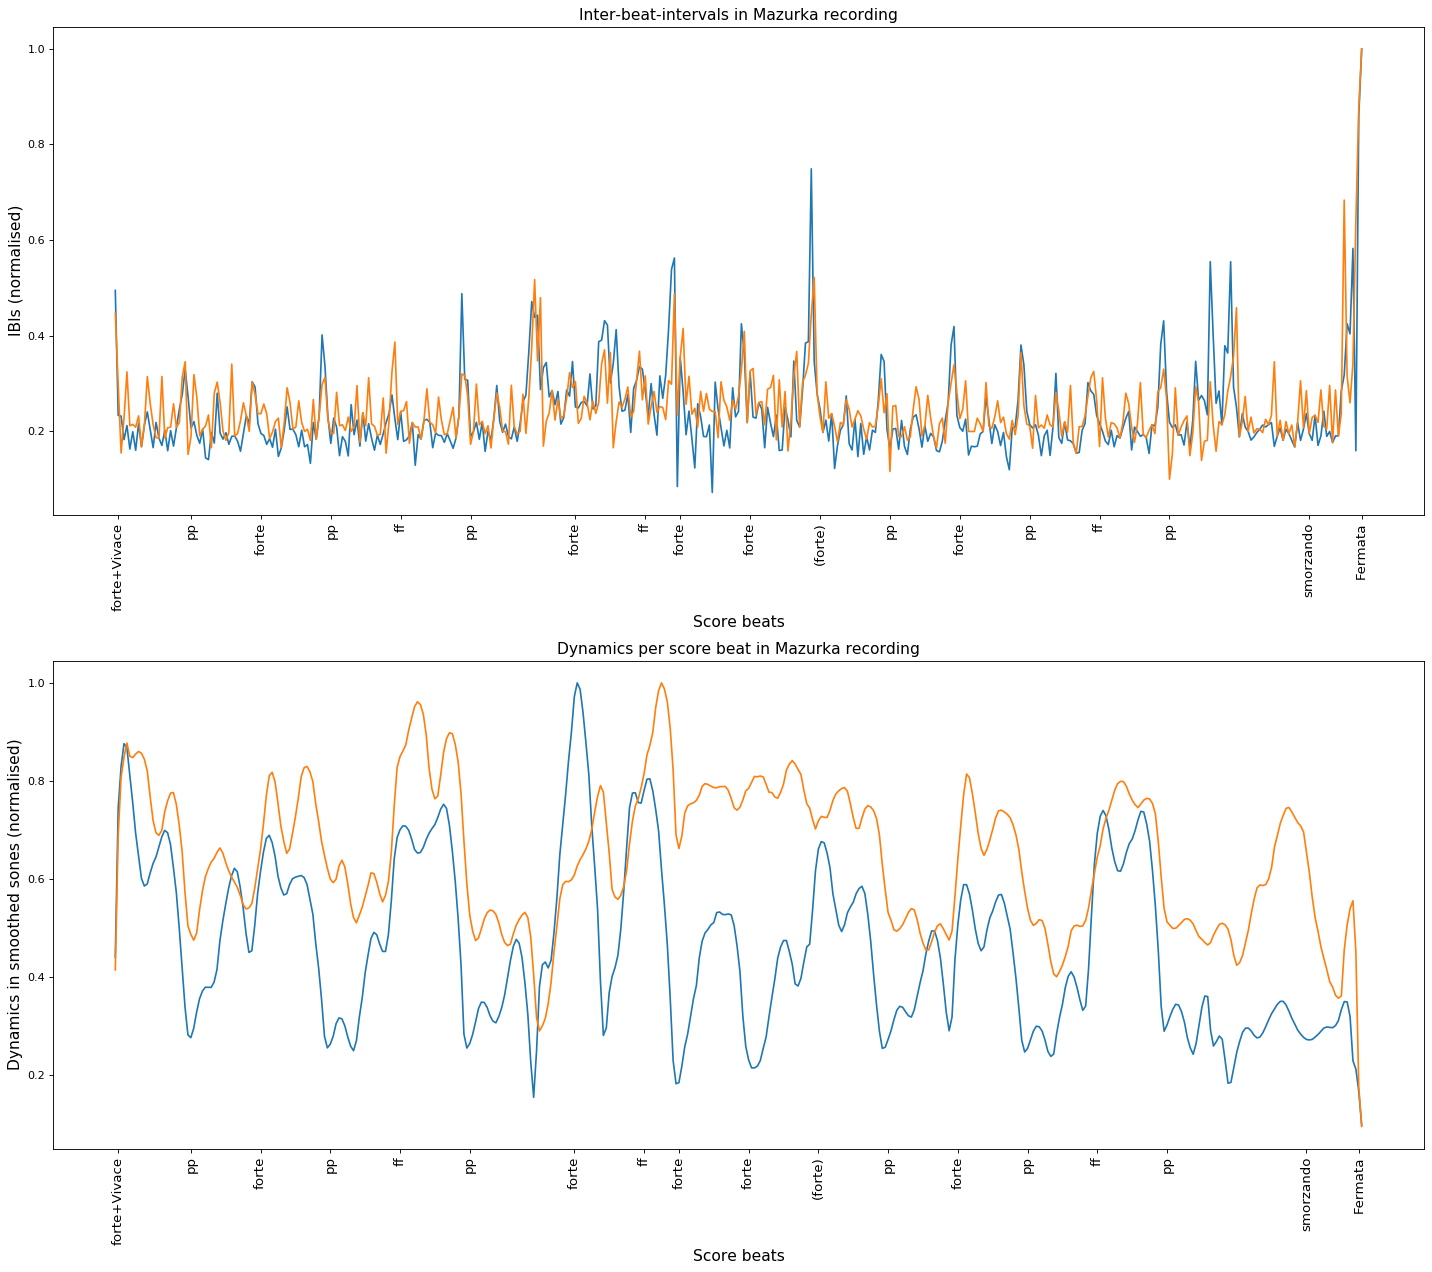

In [5]:
plot_beat_dyn(Mazurka_info['M33-2'][3:5])

In [ ]:
get_markings_dyn_values(Mazurka_info)